# Primer Script de OpenSeesPy: Modelo elástico
#### Autor: Orlando Arroyo
#### email: odarroyo@uc.cl

## Carga de librerías necesarias

In [1]:
from openseespy.opensees import *
import opsvis as opsv # hay que llamar al opsvis para poder plotear el modelo que se va generando
import matplotlib.pyplot as plt # esta es una librería estándar para plotear otras cosasy poder crear figuras.
import opseestools.analisis as an # librería de análisis con distintas 
import numpy as np # librería de Numpy para operaciones matemáticas

## Creación del modelo

In [2]:
wipe() # es una buena práctica comenzar con un wipe 
model('basic','-ndm',2,'-ndf',3) # creación del modelo de dos dimensiones con tres grados de libertad por nodo

## Definición de nodos y apoyos

<AxesSubplot:>

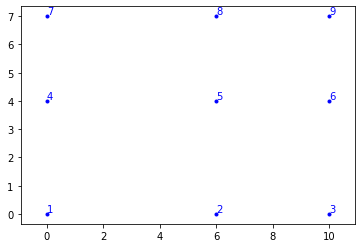

In [3]:
x1 = 6.0
x2 = 10.0
y1 = 4.0
y2 = 7.0

node(1,0.0,0.0) # Definición del nodo 1 con coordenadas X y Y de 0.0 y 0.0
node(2,x1,0.0)
node(3,x2,0.0)
node(4,0.0,y1)
node(5,x1,y1)
node(6,x2,y1)
node(7,0.0,y2)
node(8,x1,y2)
node(9,x2,y2)

# apoyos
empotrado = [1,1,1] # restringe los grados de libertad X,Y,Z
grado2 = [1,1,0] # restringe los grados de libertad X,Y, dejando libre el Z

fix(1,*empotrado)
fix(2,*empotrado)
fix(3,*grado2)

# Visualización de los nodos
opsv.plot_model()

## Definición de diafragmas y masas

In [4]:
# diafragmas
equalDOF(4,5,1) # hace que el desplazamiento del nodo 5 en X sea igual que el del nodo 4
equalDOF(4,6,1)
equalDOF(7,8,1) 
equalDOF(7,9,1)

# masas
mass(4,1,1,0) # asignación de masas en X y Y al nodo 4
mass(5,1,1,0)
mass(6,1,1,0)
mass(7,1,1,0)
mass(8,1,1,0)
mass(9,1,1,0)

## Definición de materiales

In [5]:
E = 24000000 # 24GPa pasados a KPa para hacerlo consistente con las unidades del modelo
uniaxialMaterial('Elastic',1,E) # El material 1 será elástico con módulo de elasticidad E

## Definicion de elementos

<AxesSubplot:>

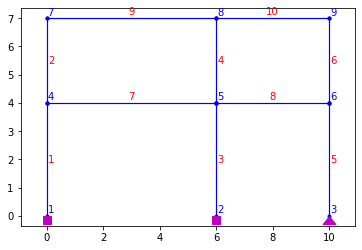

In [6]:
# Transformaciones del los elementos
lineal = 1
geomTransf('Linear',lineal) # transformación lineal

pdelta = 2
geomTransf('PDelta',pdelta) # transformación lineal

# Dimensiones y propiedades de los elementos lineales
b = 0.3
h = 0.3
A = b*h
I = b*h**3/12

# Columnas
element('elasticBeamColumn',1,1,4,A,E,I,lineal) # El elemento 1 irá del nodo 1 al 4 y tendrá propiedades A,E,I, y una transformación lineal
element('elasticBeamColumn',2,4,7,A,E,I,lineal)

element('elasticBeamColumn',3,2,5,A,E,I,lineal)
element('elasticBeamColumn',4,5,8,A,E,I,lineal)

element('elasticBeamColumn',5,3,6,A,E,I,lineal)
element('elasticBeamColumn',6,6,9,A,E,I,lineal)

# Vigas
element('elasticBeamColumn',7,4,5,A,E,I,lineal)
element('elasticBeamColumn',8,5,6,A,E,I,lineal)

element('elasticBeamColumn',9,7,8,A,E,I,lineal)
element('elasticBeamColumn',10,8,9,A,E,I,lineal)

# para ver el modelo
opsv.plot_model()

## Cargas del modelo

In [7]:
timeSeries('Linear', 1)
pattern('Plain',1,1)

# El comando load asigna una carga puntual a un nodo en los grados de libertad X, Y y Z
# Hay dos maneras de asignarlas

# Manera 1:
load(4,5.0,0.0,0.0)

# Manera 2:
carga7 = [10.0, 0.0, 0.0]
load(7,*carga7)

# El comando eleload asigna una carga al elemento:
vigas = [7,8,9,10] # tags de los elementos vigas
wviga = 20 # carga disitriibuida sobre la viga
eleLoad('-ele',*vigas,'-type','beamUniform',-wviga) # aplicación de la carga sobre la viga

## Cálculo de los valores propios y la forma modal

El periodo fundamental es:  0.2539171248294939


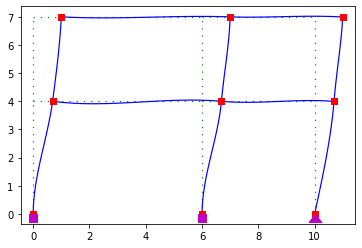

In [8]:
eig= eigen(1) # el comando eigen calcula las frecuencias de la cantidad de modos indicados. En este caso 1
T1 = 2*3.1416/np.sqrt(eig[0]) # Se obtiene el periodo correspondiente
print('El periodo fundamental es: ',T1) # Se imprime el resultado

# Visualización de la primera forma modal
opsv.plot_mode_shape(1)

## Análisis del modelo y representación de la deformada

Análisis de gravedad completado


200.23963199378272

<Figure size 432x288 with 0 Axes>

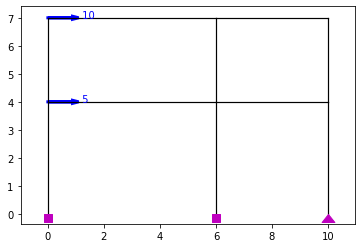

<Figure size 432x288 with 0 Axes>

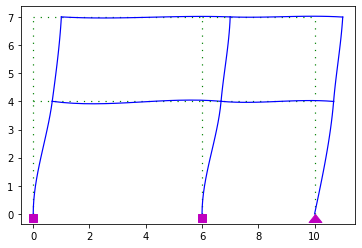

In [9]:
# Se usa la librería de análisis que se llamó

an.gravedad()

# Representación del modelo con cargas
plt.figure()
opsv.plot_loads_2d()

# Representación de la deformada
plt.figure()
opsv.plot_defo()

## Obtención de respuestas de nodos y elementos

##### Respuesta de los nodos

In [10]:
# desplazamiento del nodo 9 en X:
ux9 = nodeDisp(9,1)
print('El desplazamiento del nodo 9 en X es ', ux9)

El desplazamiento del nodo 9 en X es  0.004994016369501963


##### Respuesta de los elementos

In [11]:
# fuerzas de la columna 1
fcol1 = eleResponse(9,'globalForce')
print('Las fuerzas en la columna 1 son ', fcol1)

# Las fuerzas siempre corresponderán a los grados de libertad. En este caso son los tres del nodo inicial y los tres del nodo final

Las fuerzas en la columna 1 son  [0.0, -1.2607624711603571, -4.072139592378016, 0.0, 1.2607624711603571, -3.4924352345841267]
